## Importing the required Libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

##Importing the data

In [2]:
df = pd.read_csv("C:/Users/snopy/Favorites/Downloads/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Moving the target column to the last 
move = df["Survived"]
df.drop(columns=["Survived"],inplace=True)
df["Survived"] = move

In [5]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [6]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [7]:
#Dropping or Removing the columns which are not neccessary
df.drop(columns=["PassengerId","Name","Ticket","Cabin","Embarked"],inplace=True)

In [8]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


### EDA and pre-processing

In [9]:
pf = ProfileReport(df)

In [10]:
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

In [12]:
#Filling the null Values
df["Age"] = df["Age"].fillna(df["Age"].median())

In [13]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

In [14]:
plt.style.use("dark_background") #using balck background

In [15]:
#Now converting the Categorical data into numeric data
label = LabelEncoder()
for i in df.columns:
    df[i] = label.fit_transform(df[i])

In [16]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,2,1,28,1,0,18,0
1,0,0,51,1,0,207,1
2,2,0,34,0,0,41,1
3,0,0,47,1,0,189,1
4,2,1,47,0,0,43,0


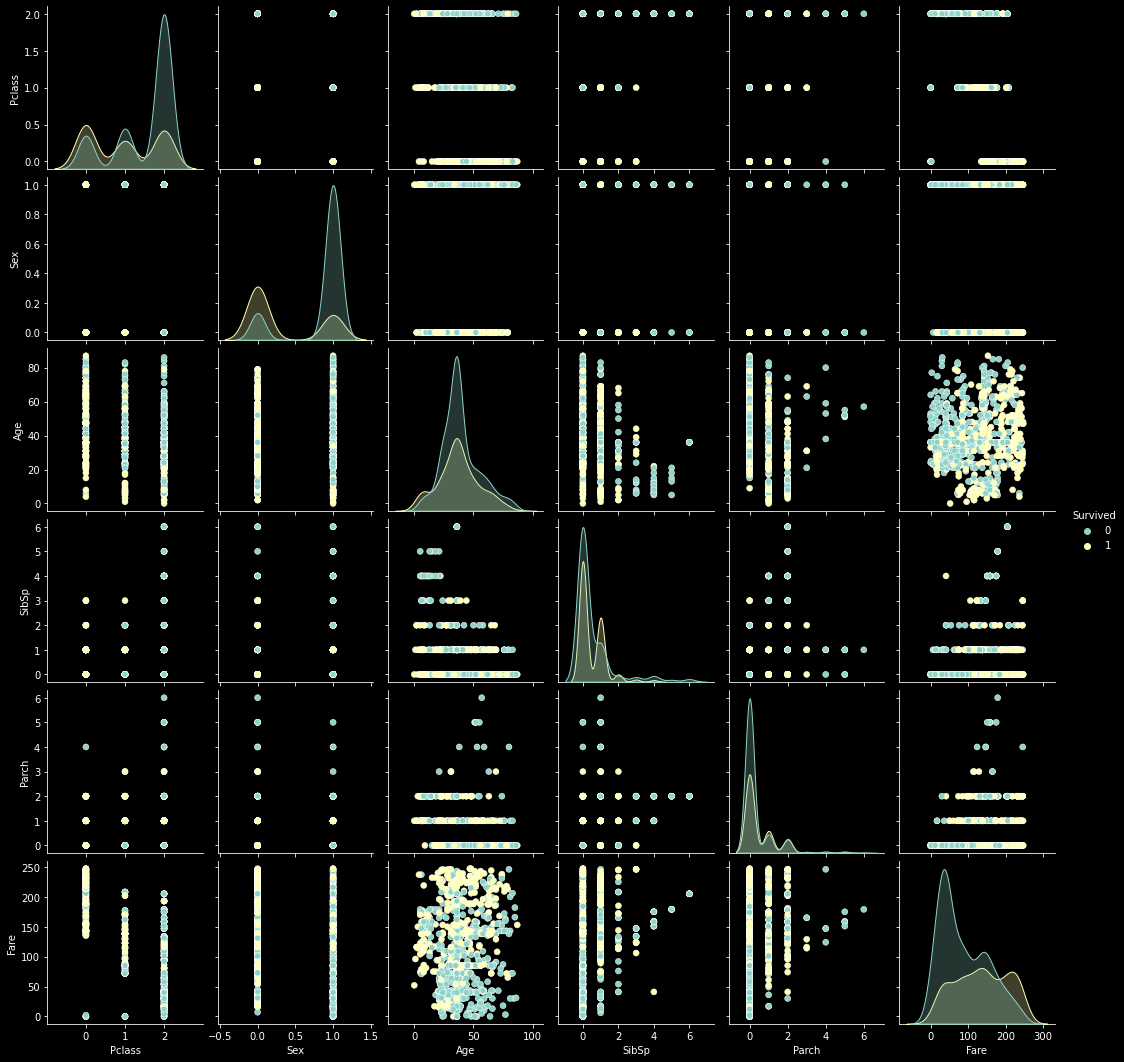

In [17]:
sns.pairplot(df,hue="Survived")

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

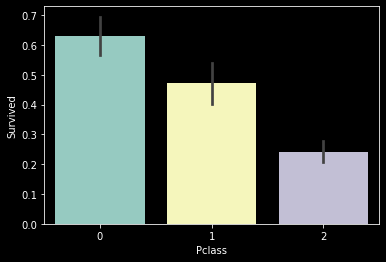

In [18]:
sns.barplot(data=df,x='Pclass',y="Survived")

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

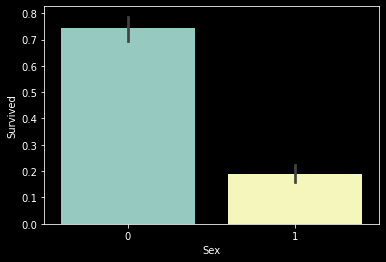

In [19]:
sns.barplot(data=df,x='Sex',y="Survived")

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

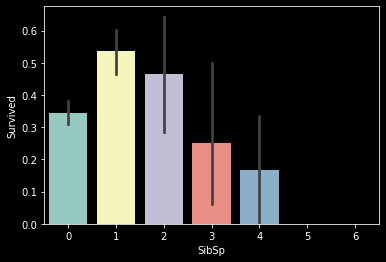

In [20]:
sns.barplot(data=df,x="SibSp",y="Survived")

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

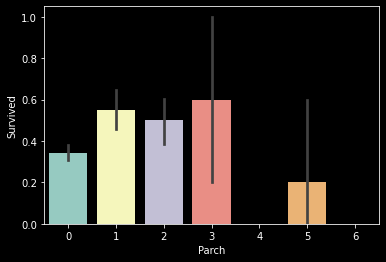

In [21]:
sns.barplot(data=df,x="Parch",y="Survived")

In [22]:
#Now splitting the data into train and test data

In [23]:
x = df.drop(columns=["Survived"])
y = df["Survived"]

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [25]:
dc_model = DecisionTreeClassifier()
dc_model.fit(x_train,y_train)
dc_predict = dc_model.predict(x_test)
accuracy_score(dc_predict,y_test)

0.752542372881356

In [26]:
dc_model.score(x_train,y_train)

0.9798657718120806

In [27]:
dc_model.score(x_test,y_test)

0.752542372881356

##Hyper_Parameter Tuning

In [71]:
parameters = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3],
    'max_features':['auto','sqrt','log2']
}

In [85]:
grid = GridSearchCV(dc_model,param_grid=parameters,cv=5,scoring='accuracy')

In [86]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [87]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [88]:
model = DecisionTreeClassifier(criterion='gini',
                              max_depth=3,
                              max_features='auto',
                              splitter='best')
model.fit(x_train,y_train)
model_pred = model.predict(x_test)
accuracy_score(model_pred,y_test)

0.8135593220338984

In [89]:
model.score(x_train,y_train)

0.8087248322147651

In [90]:
model.score(x_test,y_test)

0.8135593220338984

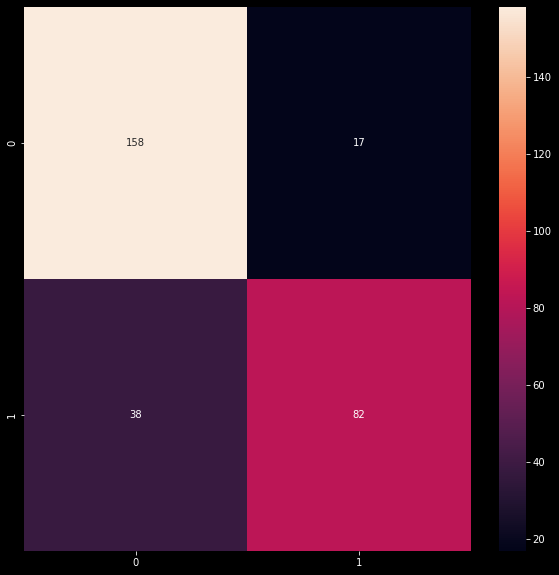

In [92]:
#Accuracy of the Model in Graphical way
cm = confusion_matrix(y_test,model_pred)
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='.0f')
plt.show()